In [1]:
%config Completer.use_jedi = False
import sys
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path
sys.path.append(f"{Path.home()}/morpho_repo/turing_codebase")
from pde_solvers.cn import *
import numpy as np
import matplotlib.pyplot as plt

In [25]:
import pandas as pd
df_params = pd.read_pickle("../../bacterialcolony_dataset3/turing_df_circuit2_variant1_1000000parametersets.pkl")

In [121]:
ID = 546780#65831#546780

params = df_params.loc[ID, :]
DA = params.DA    
DB = params.DB
bA = params.bA
bB = params.bB
bC = params.bC
bD = params.bD
bE = params.bE
bF = params.bF
VA = params.VA
VB = params.VB
VC = params.VC
VD = params.VD
VE = params.VE
VF = params.VF
Kab = params.Kab
Kbd = params.Kbd
Kce = params.Kce
Kda = params.Kda
Keb = params.Keb
Kee = params.Kee
Kfe = params.Kfe
muASV = params.muASV
muLVA = params.muLVA
nab = params.nab
nbd = params.nbd
nce = params.nce
nda = params.nda
nfe = params.nfe
neb = params.neb
nee = params.nee

In [122]:
model_32 = RD_2D_1st_Order(Ds=[DA, DB, 0, 0, 0, 0], N=50000, T=50, Lx=1, Ly=1, Ix=32, Jy=32,
                       boundary_condition=Neumann_Boundary_2D
                       #boundary_condition=Periodic_Boundary_2D
                       # boundary_condition=Diritchlet_Boundary_2D
                       )


In [123]:
model_128 = RD_2D_1st_Order(Ds=[DA, DB, 0, 0, 0, 0], N=2500, T=128, Lx=1, Ly=1, Ix=128, Jy=128,
                        boundary_condition=Neumann_Boundary_2D
                       #boundary_condition=Periodic_Boundary_2D
                       # boundary_condition=Diritchlet_Boundary_2D
                       )

In [124]:
def activate(x, km, n=2):
    act = 1 / (1 + (km / (x + 1e-20)) ** (n))
    return act

def inhibit(x, km, n=2):
    inh = 1 / (1 + (x / (km + 1e-20)) ** (n))
    return inh
def kinetics(A,B,C,D,E,F):    
    f_A =  bA + VA * inhibit(D, Kda, nda) - muASV * A
    f_B =  bB + VB * activate(A, Kab, nab) * inhibit(E, Keb, neb) - muASV * B
    f_C =  bC + VC * inhibit(D, Kda, nda) - muLVA * C
    f_D =  bD + VD * activate(B, Kbd, nbd) - muLVA * D
    f_E =  bE + VE * inhibit(C, Kce, nce) * inhibit(F, Kfe, nfe) * activate(E, Kee, nee) - muLVA * E
    f_F =  bF + VF * activate(B, Kbd, nbd) - muLVA * F
    return (f_A, f_B, f_C, f_D, f_E, f_F)


from scipy.optimize import fsolve
def create_k2():
    def k(args):
        A,B,C,D,E,F = args
        return kinetics(A,B,C,D,E,F)
    return k

steadies = fsolve(create_k2(), [1, 1, 1, 1, 10, 1])
print(steadies)
SP_128 = [steadies[i]+ np.random.normal(scale=steadies[i]*.1, size=(model_128.Ix*model_128.Jy + model_128.Ix + model_128.Jy + 1))
         for i in range(6)]

#U_128 = np.random.normal(scale=.1, size=(model_128.Ix*model_128.Jy + model_128.Ix + model_128.Jy + 1))
#U_128 += A
#V_128 = np.random.normal(scale=.1, size=(model_128.Ix*model_128.Jy + model_128.Ix + model_128.Jy + 1 ))
#V_128 += B/A

SP_32 = [np.array([[np.mean(S.reshape((129,129))[i:i+4, j:j+4]) 
                  for i in range(0,129,4)]
                  for j in range(0,129,4)]).flatten()
         for S in SP_128
        ]


[ 3.36936608  0.66273922 11.50408777  0.6120852  36.04499006  8.28370831]


In [125]:
res_32 = model_32.integrate(SP_32,kinetics, 1)

In [126]:
res_128 = model_128.integrate(SP_128,kinetics, 1)

In [ ]:
with 
np.save(546780)

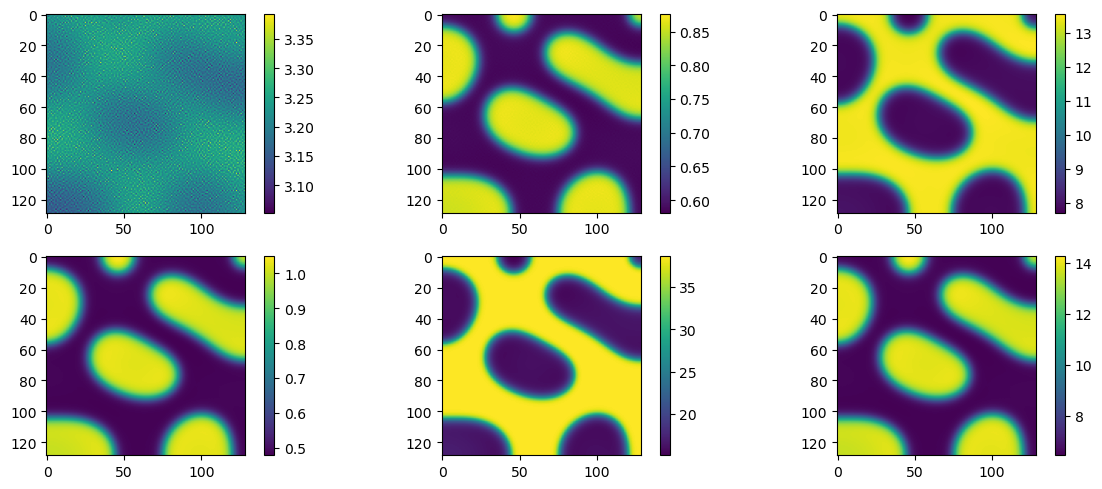

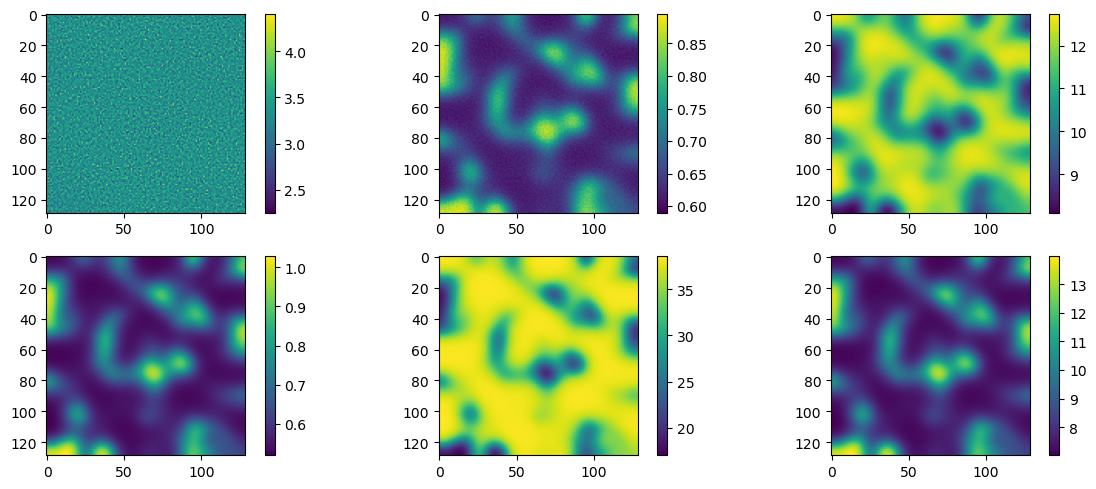

In [127]:
# plt.figure(figsize=(12, 5))
# for i in range(6):
#     plt.subplot(2,3, i+1)
#     plt.imshow(SP_128[i].reshape(model_128.Ix + 1, model_128.Jy + 1))
#     plt.colorbar()
# plt.tight_layout();plt.show()


plt.figure(figsize=(12, 5))
for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(res_128[-1, i, :].reshape(model_128.Ix + 1, model_128.Jy + 1))
    plt.colorbar()
plt.tight_layout();plt.show()


plt.figure(figsize=(12, 5))
for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(res_128[-2300, i, :].reshape(model_128.Ix + 1, model_128.Jy + 1))
    plt.colorbar()
plt.tight_layout();plt.show()

In [47]:
steadies

array([ 3.36936607,  0.66273922, 11.50408772,  0.6120852 , 36.04499073,
        8.28370827])

In [54]:
res_128.shape

(1200, 6, 16641)